In [7]:
# Install libraries (if needed)
!pip install -U nltk

# Import necessary libraries
import pandas as pd
import re
import string
import joblib
import os
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# NLTK and scikit-learn imports
import nltk
from sklearn.datasets import fetch_20newsgroups

# Mount Google Drive to save and load files
from google.colab import drive
drive.mount('/content/drive')

# Download NLTK data (critical for preprocessing)
nltk.download('stopwords')
nltk.download('wordnet')

# Load the built-in 20 Newsgroups dataset
# Using two categories to create a binary classification problem
categories = ['comp.graphics', 'rec.autos']
data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

# Create a Pandas DataFrame from the fetched data
df = pd.DataFrame({'review': data.data, 'sentiment': data.target})

# Display a preview of the dataset
print("Dataset loaded successfully!")
print(df.head())
print("\nShape of the dataset:", df.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset loaded successfully!
                                              review  sentiment
0  From: chert@dungeon.cirr.com (Chert Pellett)\n...          0
1  From: bernstei@next3.corp.mot.com (Andrew Bern...          1
2  From: rll@frieda.mitre.org (Roberto L. Landrau...          1
3  From: dchan@cisco.com (Derek Chan)\nSubject: R...          1
4  From: jr0930@eve.albany.edu (REGAN JAMES P)\nS...          0

Shape of the dataset: (1963, 2)


In [8]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Check if the input is a string; if not, return an empty string
    if not isinstance(text, str):
        return ""

    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenize, remove stopwords, and lemmatize
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join the cleaned tokens back into a single string
    return ' '.join(tokens)

# Apply the preprocessing function to the 'review' column
df['cleaned_review'] = df['review'].apply(preprocess_text)

# Display a sample of the new 'cleaned_review' column
print("Cleaned reviews preview:")
print(df[['review', 'cleaned_review']].head())

Cleaned reviews preview:
                                              review  \
0  From: chert@dungeon.cirr.com (Chert Pellett)\n...   
1  From: bernstei@next3.corp.mot.com (Andrew Bern...   
2  From: rll@frieda.mitre.org (Roberto L. Landrau...   
3  From: dchan@cisco.com (Derek Chan)\nSubject: R...   
4  From: jr0930@eve.albany.edu (REGAN JAMES P)\nS...   

                                      cleaned_review  
0  chertdungeoncirrcom chert pellett subject epso...  
1  bernsteinext3corpmotcom andrew bernstein subje...  
2  rllfriedamitreorg roberto l landrau subject ea...  
3  dchanciscocom derek chan subject service indic...  
4  jr0930evealbanyedu regan james p subject pasca...  


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Define features (X) and target (y)
X_text = df['cleaned_review']
y = df['sentiment']

# Convert the cleaned text to numerical TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(X_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression classifier
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)

# Train a Multinomial Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

print("Models trained successfully!")

Models trained successfully!


In [10]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test data
lr_preds = lr_model.predict(X_test)
nb_preds = nb_model.predict(X_test)

# Evaluate Logistic Regression
print("--- Logistic Regression Performance ---")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("Classification Report:\n", classification_report(y_test, lr_preds))

# Evaluate Naive Bayes
print("\n--- Naive Bayes Performance ---")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print("Classification Report:\n", classification_report(y_test, nb_preds))

# Define a path in Google Drive to save the models
model_dir = '/content/drive/My Drive/sentiment_analysis_models'
os.makedirs(model_dir, exist_ok=True)

# Save the trained models and the vectorizer
joblib.dump(lr_model, os.path.join(model_dir, 'logistic_regression_model.pkl'))
joblib.dump(nb_model, os.path.join(model_dir, 'naive_bayes_model.pkl'))
joblib.dump(tfidf_vectorizer, os.path.join(model_dir, 'tfidf_vectorizer.pkl'))

print("\nModels and vectorizer saved to Google Drive.")

--- Logistic Regression Performance ---
Accuracy: 0.9847328244274809
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       199
           1       0.99      0.98      0.98       194

    accuracy                           0.98       393
   macro avg       0.98      0.98      0.98       393
weighted avg       0.98      0.98      0.98       393


--- Naive Bayes Performance ---
Accuracy: 0.9847328244274809
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       199
           1       0.99      0.98      0.98       194

    accuracy                           0.98       393
   macro avg       0.98      0.98      0.98       393
weighted avg       0.98      0.98      0.98       393


Models and vectorizer saved to Google Drive.


Top words for Category 0 ('comp.graphics'):
[('image', 1798), ('line', 1298), ('file', 1198), ('subject', 1067), ('organization', 974), ('graphic', 828), ('jpeg', 700), ('program', 694), ('format', 691), ('university', 615), ('would', 566), ('system', 540), ('also', 539), ('software', 525), ('one', 517), ('version', 514), ('computer', 500), ('use', 500), ('color', 496), ('available', 487), ('data', 476), ('get', 452), ('know', 447), ('like', 436), ('nntppostinghost', 433), ('3d', 416), ('article', 415), ('need', 403), ('bit', 403), ('display', 401)]


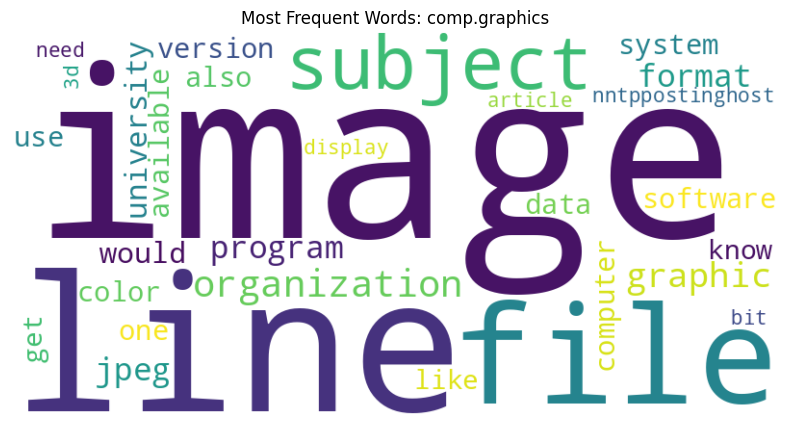


Top words for Category 1 ('rec.autos'):
[('car', 1995), ('line', 1066), ('subject', 1041), ('organization', 987), ('writes', 806), ('article', 739), ('would', 646), ('one', 603), ('like', 542), ('get', 512), ('dont', 483), ('engine', 470), ('nntppostinghost', 459), ('university', 442), ('know', 408), ('good', 395), ('also', 394), ('new', 376), ('think', 362), ('im', 361), ('time', 341), ('much', 331), ('distribution', 330), ('year', 325), ('problem', 294), ('usa', 279), ('make', 279), ('dealer', 274), ('u', 271), ('well', 267)]


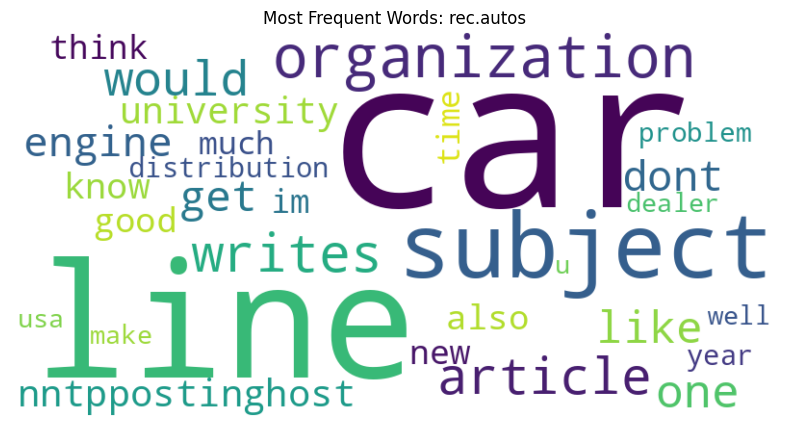

In [11]:
def get_top_words(data, sentiment, n=30):
    sentiment_data = data[data['sentiment'] == sentiment]['cleaned_review']
    all_words = ' '.join(sentiment_data).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

# Get the most frequent words for each category
# Note: The categories are 'comp.graphics' (0) and 'rec.autos' (1)
category_0_words = get_top_words(df, sentiment=0)
category_1_words = get_top_words(df, sentiment=1)

# Function to create and display a Word Cloud
def create_wordcloud(word_list, title):
    word_dict = {word: count for word, count in word_list}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

print("Top words for Category 0 ('comp.graphics'):")
print(category_0_words)
create_wordcloud(category_0_words, 'Most Frequent Words: comp.graphics')

print("\nTop words for Category 1 ('rec.autos'):")
print(category_1_words)
create_wordcloud(category_1_words, 'Most Frequent Words: rec.autos')
